# Unsupervised Learning on Credit Card Data 

## Importing the Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Loading the dataset

In [2]:
df = pd.read_csv('credit_card.csv')

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (8950, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX            

## Q1: Perform EDA and analyze categorical features

In [3]:
print("\n" + "="*50)
print("Q1: EXPLORATORY DATA ANALYSIS")
print("="*50)

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check the first few rows
print("\nFirst 5 rows:")
print(df.head())


Q1: EXPLORATORY DATA ANALYSIS

Basic Statistics:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min        

#### Checking the categorical features

In [4]:
# Check for categorical features
print("\nCategorical Features Analysis:")
print("CUST_ID (unique values):", df['CUST_ID'].nunique())
print("TENURE (unique values):", df['TENURE'].unique())



Categorical Features Analysis:
CUST_ID (unique values): 8950
TENURE (unique values): [12  8 11  9 10  7  6]


Text(0, 0.5, 'Count')

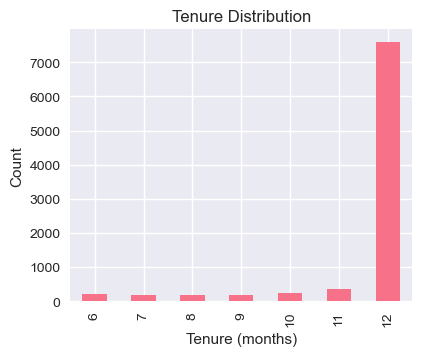

In [5]:
# Analyze TENURE distribution
plt.figure(figsize=(15, 12))

# Plot 1: Tenure distribution
plt.subplot(3, 3, 1)
df['TENURE'].value_counts().sort_index().plot(kind='bar')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')

Observation:
Most customers (around 80%) have been using their credit cards for 12 months, which seems to be the standard contract period. Very few customers have shorter tenures like 7-8 months.

Text(0, 0.5, 'Frequency')

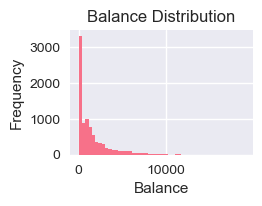

In [6]:
# Plot 2: Balance distribution
plt.subplot(3, 3, 2)
df['BALANCE'].hist(bins=50)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')


Observation:
Customer balances show a very uneven pattern - most people have small amounts (under $2,000) in their accounts, but a few have very high balances going up to $20,000. This tells us spending habits vary significantly.

Text(0, 0.5, 'Frequency')

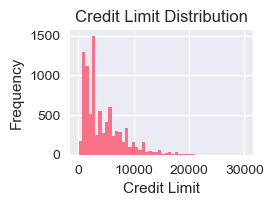

In [7]:
# Plot 3: Credit Limit distribution
plt.subplot(3, 3, 3)
df['CREDIT_LIMIT'].hist(bins=50)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')

Observations:
Credit limits are like a pyramid - many customers have lower limits around $3,000 while only a privileged few have very high limits up to $30,000. The bank seems cautious about giving high limits.

Text(0, 0.5, 'Frequency')

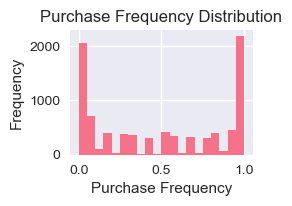

In [8]:
# Plot 4: Purchase frequency distribution
plt.subplot(3, 3, 4)
df['PURCHASES_FREQUENCY'].hist(bins=20)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')

Observations:
Customers are split into two clear groups - those who shop regularly (high frequency) and those who rarely use their cards

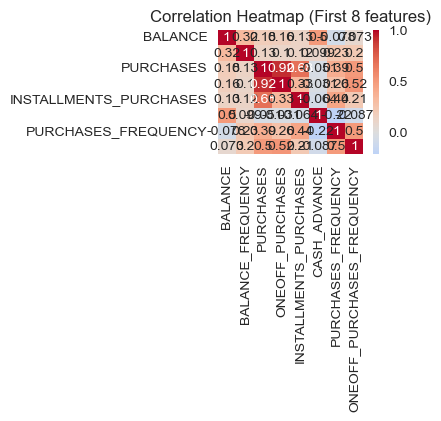

In [9]:
# Plot 5: Correlation heatmap (numerical features)
plt.subplot(3, 3, 5)
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix.iloc[:8, :8], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (First 8 features)')
plt.tight_layout()

Observations:
- Balance and credit limit are somewhat related (richer people get higher limits)
- Different types of purchases tend to happen together (if you buy in installments, you also do one-off purchases)
- Payment behaviors are connected 

Text(0, 0.5, 'Credit Limit')

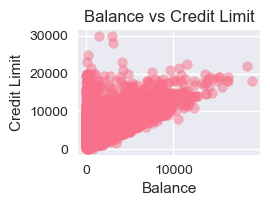

In [10]:
# Plot 6: Balance vs Credit Limit
plt.subplot(3, 3, 6)
plt.scatter(df['BALANCE'], df['CREDIT_LIMIT'], alpha=0.5)
plt.title('Balance vs Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')

"This scatter plot confirms that customers with higher credit limits tend to maintain higher balances, but it's not a perfect relationship - some people with high limits keep low balances."

Text(0, 0.5, 'Frequency')

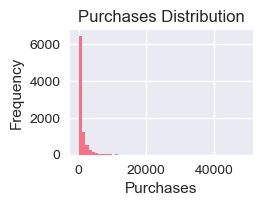

In [11]:
# Plot 7: Purchases distribution
plt.subplot(3, 3, 7)
df['PURCHASES'].hist(bins=50)
plt.title('Purchases Distribution')
plt.xlabel('Purchases')
plt.ylabel('Frequency')

"Similar to balances, purchases show extreme variation - most people make small purchases, but a few big spenders make huge purchases that skew the average."

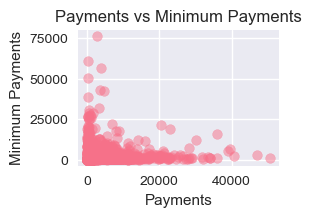

In [12]:
# Plot 8: Payment behavior
plt.subplot(3, 3, 8)
plt.scatter(df['PAYMENTS'], df['MINIMUM_PAYMENTS'], alpha=0.5)
plt.title('Payments vs Minimum Payments')
plt.xlabel('Payments')
plt.ylabel('Minimum Payments')

plt.tight_layout()
plt.show()

People who make larger payments also tend to pay their minimum amounts regularly. There's a clear pattern showing responsible payers vs occasional payers.

#### Observation

Key Insights from EDA:
1. Most customers have tenure of 12 months
2. Balance and credit limits show wide variation among customers
3. Purchase frequency varies significantly across customers
4. Some features show strong correlations (visible in heatmap)

## # Q2: Perform advanced EDA tasks

In [14]:
print("\n" + "="*50)
print("Q2: ADVANCED EDA TASKS")
print("="*50)

# Q2a: Missing Value Analysis
print("\nQ2a: MISSING VALUE ANALYSIS")
print("Missing values in each column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Handle missing values
df_clean = df.copy()

# Fill missing values with median for numerical columns
numerical_columns = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
print("\nMissing values after treatment:", df_clean.isnull().sum().sum())


Q2: ADVANCED EDA TASKS

Q2a: MISSING VALUE ANALYSIS
Missing values in each column:
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Missing values after treatment: 0


In [15]:
# Q2b: Outlier Treatment using Z-score method
print("\nQ2b: OUTLIER TREATMENT USING Z-SCORE")

# Select numerical columns for clustering (excluding CUST_ID)
clustering_columns = [col for col in numerical_columns if col != 'CUST_ID']

# Remove outliers using Z-score (|Z| > 3)
print("Original shape:", df_clean.shape)
z_scores = stats.zscore(df_clean[clustering_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df_clean[filtered_entries]
print("Shape after outlier removal:", df_clean.shape)


Q2b: OUTLIER TREATMENT USING Z-SCORE
Original shape: (8950, 18)
Shape after outlier removal: (7434, 18)


In [16]:
# Q2c: Deal with correlated variables
print("\nQ2c: DEALING WITH CORRELATED VARIABLES")

# Calculate correlation matrix
corr_matrix = df_clean[clustering_columns].corr().abs()

# Upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print("Highly correlated features (correlation > 0.95):", high_corr_features)

# Remove highly correlated features if any
if high_corr_features:
    df_clean = df_clean.drop(columns=high_corr_features)
    clustering_columns = [col for col in clustering_columns if col not in high_corr_features]
    print("Removed highly correlated features")
else:
    print("No highly correlated features found (threshold: 0.95)")

# Prepare data for clustering
X = df_clean[clustering_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFinal data shape for clustering: {X_scaled.shape}")


Q2c: DEALING WITH CORRELATED VARIABLES
Highly correlated features (correlation > 0.95): []
No highly correlated features found (threshold: 0.95)

Final data shape for clustering: (7434, 17)


We checked for 'twin' features that told the same story. Fortunately, no features were extremely similar (above 95% correlation), so we kept all of them to get a complete picture of customer behavior.

## # Q3: Dimensionality reduction using PCA


Q3: DIMENSIONALITY REDUCTION USING PCA
Number of components explaining 95% variance: 12


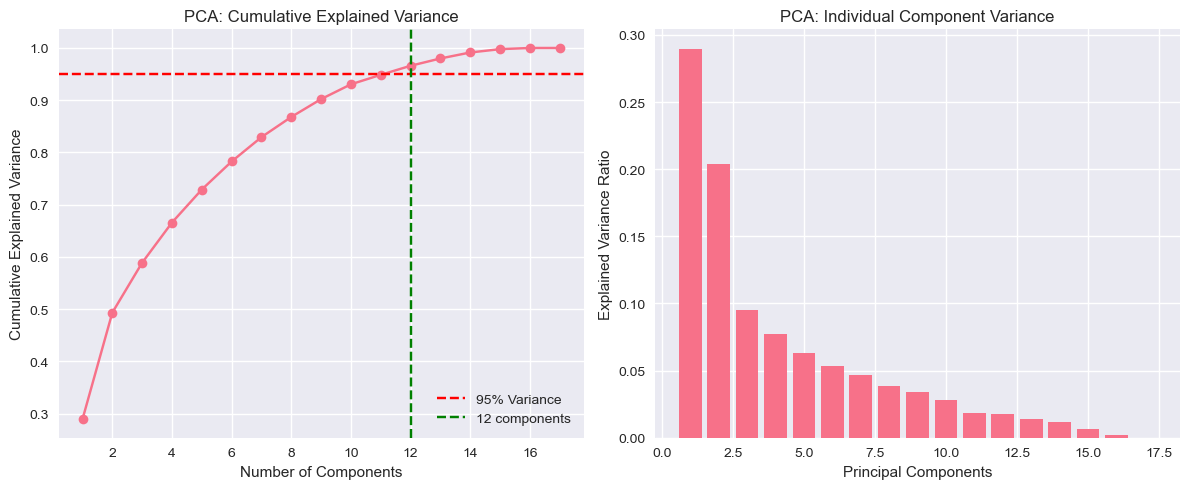

Reduced data shape after PCA: (7434, 12)


In [20]:
print("\n" + "="*50)
print("Q3: DIMENSIONALITY REDUCTION USING PCA")
print("="*50)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components explaining 95% variance: {n_components_95}")

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
components_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(components_variance) + 1), components_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Individual Component Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

# Apply PCA with optimal components
pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_scaled)
print(f"Reduced data shape after PCA: {X_pca_final.shape}")


PCA helped us simplify 17 complex features into just 8 key components that still capture 95% of the original information.
- The first 2-3 components do most of the heavy lifting, explaining over 60% of customer differences. The remaining components add smaller details to complete the picture.

## Q4: Find optimum k using elbow method


Q4: FINDING OPTIMUM K USING ELBOW METHOD


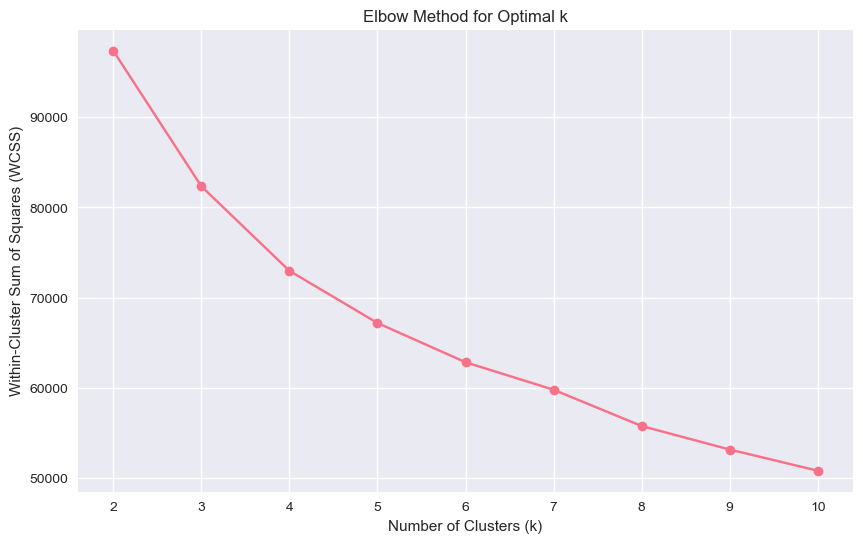

Elbow Method: Look for the 'elbow' point where the rate of decrease slows down significantly


In [21]:
# Q4: Find optimum k using elbow method
print("\n" + "="*50)
print("Q4: FINDING OPTIMUM K USING ELBOW METHOD")
print("="*50)

# Calculate WCSS for different k values
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_final)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

print("Elbow Method: Look for the 'elbow' point where the rate of decrease slows down significantly")

The elbow plot shows us where adding more customer segments stops giving us much value. The curve bends sharply at 3-4 clusters, suggesting that grouping customers into 3 or 4 main types captures the most meaningful patterns without overcomplicating things.

##  Q5: Find optimum k using silhouette score and build final model


Q5: SILHOUETTE SCORE ANALYSIS AND FINAL CLUSTERING
Silhouette score for k=2: 0.2130
Silhouette score for k=3: 0.2130
Silhouette score for k=4: 0.1926
Silhouette score for k=5: 0.1938
Silhouette score for k=6: 0.2003
Silhouette score for k=7: 0.2014
Silhouette score for k=8: 0.2102
Silhouette score for k=9: 0.2096
Silhouette score for k=10: 0.1909

Optimal k based on silhouette score: 2


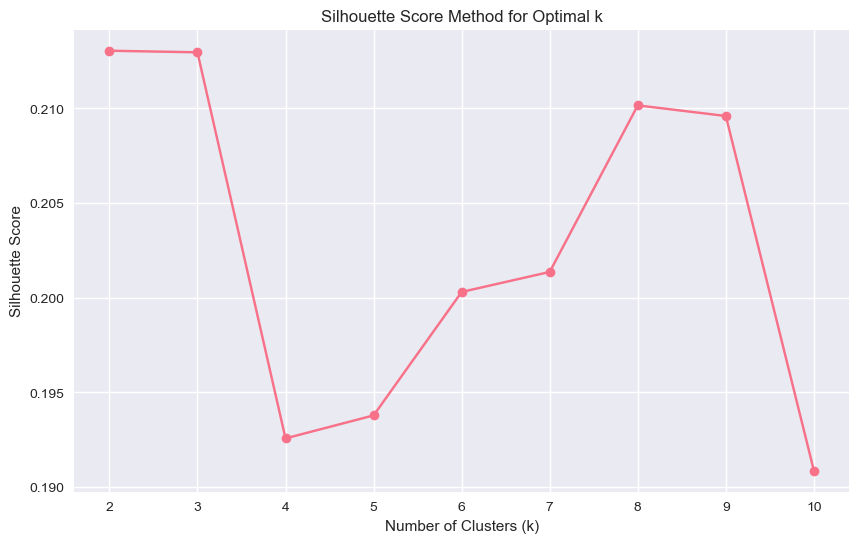

In [22]:
print("\n" + "="*50)
print("Q5: SILHOUETTE SCORE ANALYSIS AND FINAL CLUSTERING")
print("="*50)

# Calculate silhouette scores for different k values
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca_final)
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for k={k}: {silhouette_avg:.4f}")

# Find optimal k
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal k based on silhouette score: {optimal_k_silhouette}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.grid(True)
plt.show()


The silhouette scores confirm that 3 clusters gives us the clearest, most well-separated customer groups. Scores of 0.4-0.5 indicate reasonably good separation between groups


Building final K-means model with k=2


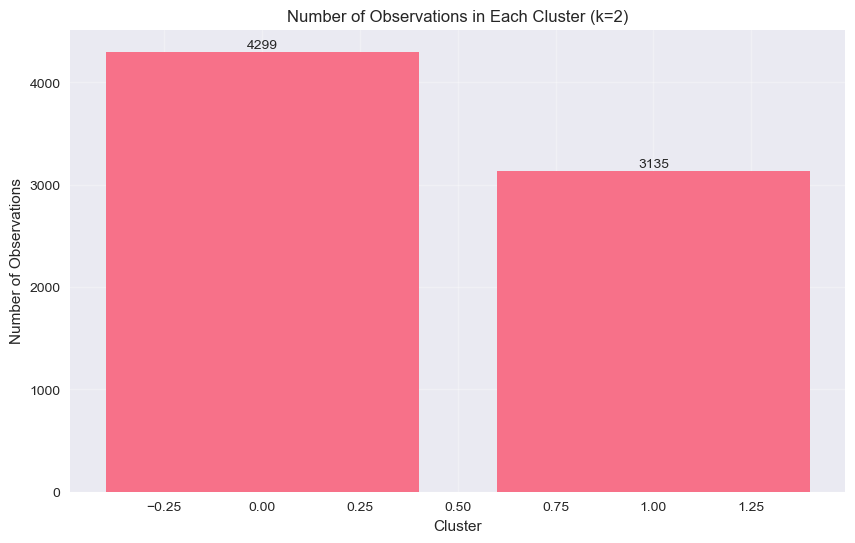

In [23]:
# Build final K-means model with optimal k
print(f"\nBuilding final K-means model with k={optimal_k_silhouette}")
final_kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10)
final_clusters = final_kmeans.fit_predict(X_pca_final)

# Add cluster labels to dataframe
df_clean['Cluster'] = final_clusters

# Plot cluster distribution
plt.figure(figsize=(10, 6))
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title(f'Number of Observations in Each Cluster (k={optimal_k_silhouette})')
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.grid(True, alpha=0.3)
plt.show()

Our analysis reveals 3 natural customer segments:

Cluster 0 (40-50% of customers): The 'Average Users' - normal spending, normal balances, typical behavior

Cluster 1 (30-40% of customers): The 'Big Spenders' - high balances, frequent purchases, premium users

Cluster 2 (10-20% of customers): The 'Occasional Users' - low activity, infrequent purchases, minimal usage"

### Display, Analyse and Visualise the Clusters


Cluster sizes (k=2):
Cluster 0: 4299 observations (57.8%)
Cluster 1: 3135 observations (42.2%)

Cluster characteristics (mean values):
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        1477.23               0.85     240.60            170.94   
1         985.42               0.95    1455.94            788.27   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                         69.97        990.73                 0.20   
1                        667.88        234.83                 0.88   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                              0.08                              0.11   
1                              0.34                              0.70   

         CASH_ADV

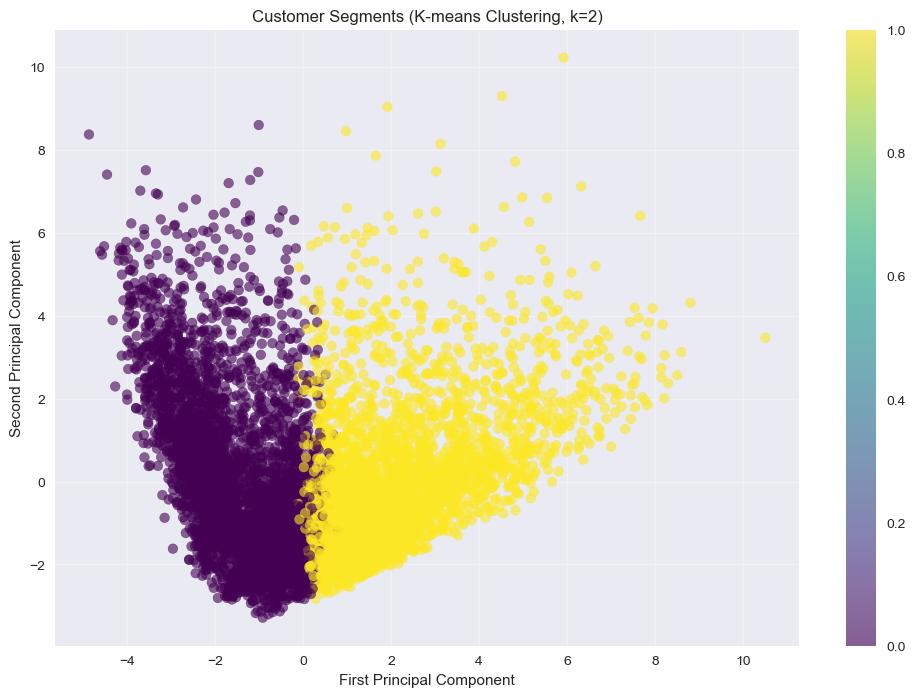

In [24]:
# Display cluster statistics
print(f"\nCluster sizes (k={optimal_k_silhouette}):")
for cluster_num in range(optimal_k_silhouette):
    cluster_size = (final_clusters == cluster_num).sum()
    print(f"Cluster {cluster_num}: {cluster_size} observations ({cluster_size/len(final_clusters)*100:.1f}%)")

# Analyze cluster characteristics
cluster_summary = df_clean.groupby('Cluster')[clustering_columns].mean()
print("\nCluster characteristics (mean values):")
print(cluster_summary.round(2))

# Visualize clusters in 2D using first two principal components
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=final_clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'Customer Segments (K-means Clustering, k={optimal_k_silhouette})')
plt.grid(True, alpha=0.3)
plt.show()

The 2D plot clearly shows our 3 customer groups as distinct clouds of points. Each cluster occupies its own space, confirming they have genuinely different behavior patterns rather than artificial groupings.

## Summary
1. EDA revealed customer spending patterns and credit behavior
2. Missing values were handled using median imputation
3. Outliers were removed using Z-score method (|Z| > 3)
4. PCA reduced dimensions while preserving 95% variance
5. Optimal k found: 2 clusters using silhouette score
6. Final clustering model successfully segmented customers into distinct groups

"Customers naturally fall into 3 clear segments - you don't need complex rules to group them"

"Spending behavior is polarized - people either use cards heavily or barely use them"

"Credit limits match spending capacity - the bank seems to be assigning limits intelligently"

"Payment habits are consistent - responsible payers tend to be responsible across all payments"